<a href="https://colab.research.google.com/github/GravitonQ/GravitonQ/blob/main/Machine_Learning_Particle_Identification_PANDA_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Particle Collision Identification PANDA experiment** 
Project from University of Groningen, Physics Bachelor
Students:

*   Niels Bouwman S4508688
*   Rutger Hornstra S4167619
*   Gianmarco Morbelli S4513932
*   Koen de Regt S3819566

Important matters regarding the code:  


*   It has been created on Google Colab, therefore it is advisable to debug it on the same platform, as some interactive functions may not work well on other compilers (e.g. Jupyter)
*  For the creation of this notebook the use of the sample notebooks provided during the lectures has been helpful and thus we refer it now at the beginning as required by the lecturer. 
*   The cells can be executed all at once, although it is advisable to do it one per one since cell 10 contains an interactive version of the classifier which waits for input from the user and thus it won't run further cells unless it recevies inputs (in order to overcome this it is possible to  manually comment cell 10 and then cells can be all executed at once)
*   NOTA BENE: The notebook execution time is (assuming commenting of cell 10) around 4 minutes 30 seconds.






We begin our development of the machine learning algorithm by importing the relevant modules and data sets essential for the notebook to run.

In [ ]:
import pandas as pd 
import requests 
from six import StringIO                             
import numpy as np
import requests                                      
from requests.auth import HTTPBasicAuth            
import matplotlib.pyplot as plt                      
from matplotlib.colors import ListedColormap        
import matplotlib as mpl
import seaborn as sn                                 
from sklearn import tree                             
from sklearn import neighbors                        
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier     
from random import uniform as random_uniform        
from IPython.core.display import Image                                    
import re                                           
#import VisualizeNN as VisNN                                                                           
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#We update some matplotlib parameters for better visualization
mpl.rcParams.update({'font.size': 20, 'font.family': 'serif', 'xtick.major.pad' : 5, 'ytick.major.pad' : 5})
from sklearn.metrics import confusion_matrix
import graphviz
import seaborn as sns   
#Importing the data_sets
url="https://drive.google.com/uc?export=download&id=1bY6ZPF3WLxfviYSSViuw1SEx1_sWxP46"
url2 = "https://drive.google.com/uc?export=download&id=1TvbbCV-kJeNMuIORMyiMFgH_u_CQSZhX"
s=requests.get(url).content
s_2 = requests.get(url2).content
photons = pd.read_csv(StringIO(s.decode('utf-8')))
neutrons  = pd.read_csv(StringIO(s_2.decode('utf-8')))

In [ ]:
#We print some instances of the photon data set to start have a feeling of the collision events
#We also add a column labelling the photon as particle 1
photons.insert(0, 'Particle', 1, allow_duplicates=False)
photons.head(10)

,Particle,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,1,49.9085,2.28061,0.201656,4,1,0.171442,1.000000,1.000000,0.845587,0.026810,0.681305
1,1,91.4437,50.85850,0.517213,14,1,0.196177,0.452177,0.947210,0.887481,0.024033,0.882948
2,1,21.5649,-15.09720,1.376870,22,2,0.629236,0.572265,0.880997,0.866884,0.015212,0.799525
3,1,92.4443,3.56594,0.956886,18,2,0.345639,0.542478,0.833899,0.734324,0.049628,0.908339
4,1,108.5060,-84.91500,0.759574,14,1,0.491971,0.930898,0.799791,0.883198,0.011530,0.944113
5,1,97.3716,38.33720,0.915771,23,1,0.245303,0.461334,0.699703,0.833461,0.027505,0.965649
6,1,63.8539,105.98600,2.153560,34,2,1.323210,0.762178,0.870853,0.865712,0.019282,0.983002
7,1,140.9230,-77.91920,0.106224,9,1,0.028432,1.000000,1.000000,0.050571,0.016896,0.995861
8,1,62.6097,155.04700,0.456599,11,1,0.204034,0.536292,1.000000,0.727547,0.069761,0.990785
9,1,158.6000,91.10340,1.293620,29,1,0.597296,0.639848,0.868161,0.783006,0.014039,0.990153


In [ ]:
#Similarly for the neutron collisions
#We also add a column labelling the neutron as particle 2
neutrons.insert(0, 'Particle', 2, allow_duplicates=False)
neutrons.head(10)

,Particle,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,2,50.8457,-0.008022,1.67371,19,1,1.05547,0.667862,0.960176,0.970492,0.003752,0.372940
1,2,22.9273,-119.515000,4.69804,19,1,2.90849,0.641230,0.975758,0.978056,0.000140,0.674813
2,2,130.3010,-126.725000,2.77313,17,1,1.82686,0.680077,0.976782,0.974232,0.003527,0.303936
3,2,160.2830,59.330500,3.09939,20,1,2.17111,0.735619,0.967568,0.970230,0.000979,0.690777
4,2,89.4000,-15.521300,3.19431,21,1,2.40089,0.774224,0.978969,0.974945,0.000703,0.882015
5,2,139.0280,-70.984200,2.60591,15,1,2.13148,0.834830,0.982274,0.986103,0.000272,0.293170
6,2,84.8437,11.418400,4.49077,21,1,3.40589,0.789929,0.965803,0.977027,0.000977,0.289701
7,2,134.8600,-28.724400,3.77419,24,1,2.45138,0.688274,0.954665,0.965743,0.002336,0.392584
8,2,55.6068,-123.040000,2.35087,22,1,1.89066,0.849390,0.966758,0.958768,0.001775,0.971265
9,2,94.7422,26.807800,2.89034,21,1,1.77719,0.637578,0.978900,0.973076,0.002064,0.587630


In [ ]:
#Concatenating the dataframe
datasets = [photons, neutrons]
mixed_data = pd.concat(datasets)
#Resetting the index for convenience
mixed_data.reset_index(level=None, drop=False, inplace=True)
mixed_data.head(800000)

,index,Particle,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,0,1,49.9085,2.28061,0.201656,4,1,0.171442,1.000000,1.000000,0.845587,0.026810,0.681305
1,1,1,91.4437,50.85850,0.517213,14,1,0.196177,0.452177,0.947210,0.887481,0.024033,0.882948
2,2,1,21.5649,-15.09720,1.376870,22,2,0.629236,0.572265,0.880997,0.866884,0.015212,0.799525
3,3,1,92.4443,3.56594,0.956886,18,2,0.345639,0.542478,0.833899,0.734324,0.049628,0.908339
4,4,1,108.5060,-84.91500,0.759574,14,1,0.491971,0.930898,0.799791,0.883198,0.011530,0.944113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86867,43355,2,61.9661,-60.42390,2.549420,22,1,1.830020,0.766664,0.943171,0.969108,0.001640,0.384306
86868,43356,2,22.4791,64.48530,2.548380,16,1,1.986730,0.809243,0.989616,0.969068,0.004195,0.750625
86869,43357,2,119.5940,148.67400,2.287310,18,1,1.651100,0.748113,0.971611,0.976960,0.001973,0.262242
86870,43358,2,113.1480,-72.60140,1.833780,19,1,1.336700,0.758971,0.978572,0.965970,0.007557,0.353321


We start our project by visualizing the collision events for the photons and neutrons respectively, and also look at the possible correlations that the numerous features recorded by the PANDA experiment possess.  
In order to do so, we first create a matrix displaying the correlation between features of the collisions for the mixed data set. By labelling each particle with a different colour we are able to distinguish which pair of feature(s) is more powerful for the machine learning algorithm. 

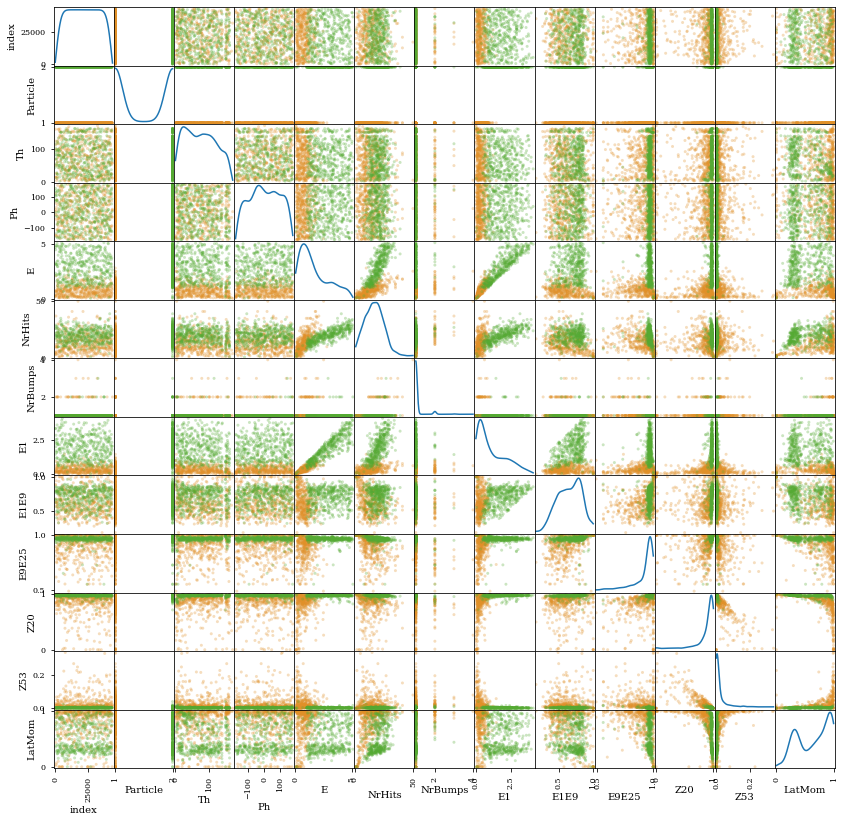

In [ ]:
#We label the photon with orange, the neutron with green
colors = ['#e09028', '#55aa33']

#We select a small part of the data for the scattering matrix due to computational
#power. We will use the full data set afterwards.
rows = mixed_data.iloc[::100, :]

#Creating the scattering matrix from panda module
scattering_matrix = pd.plotting.scatter_matrix(rows, figsize=(14,14), diagonal='kde',
                                               alpha=0.3, color=[colors[x-1] for x in list(rows.Particle)])

Thanks to the helpful visualization offered by the scattering matrix we can infer that there exist a list of features which seem to be relevant in discerning the particle collisions and some that on the contrary show little aid. Starting with the latter, we can see from the matrix that properties of the events such as latelar moment (LatMom) are mixed and shared by photons and neutrons for almost each combination of the remaining features. As a concrete example, the plot LatMom vs Ph (Azimuthal angle) gives little knowledge about the way photons and neutrons differn when hitting the detector: no well defined pattern in the plot can be found (this conclusion is made thanks to the coloring of the particles, which allow for a clear distinction between the events). Even worse, the correlation between the angles Ph and Th are useless to the algorithm since their plots almost completely overlap. This is physically reasonable, since we do not expect a preferred direction of collission for each particle or the other. It is worth noting that although the angles do not correlate appropriately, the plots energy vs angle features seem to be useful for the classifier, for their particle labels are well divided. 

Furthermore, the plots of energy of the clusters vs other energy features seem to give a clearer distinction between the type of particle hitting the detector. For instance we can cleary distinguish the events for the E1 vs E1E9 correlation plot, and additionally we can infer that these parameters are optimum inputs to the classification algorithm. Again, it should not be suprise that these energy correlations are important in distinguishing the different collisions, for each particle carries a range of several energies.   
Another pair of features that seem to be useful for our classification algorithm are the energy E1 against the angles Ph and Th. Their plot, indeed, show a neat distinction between the two particle events and thus they may be of excellent aid for the ML classifier.  
To conclude this preliminary analysys we also create and plot a correlation matrix for our mixed data set. This could help in confirming or denying the statements and conclusions we reached so far.

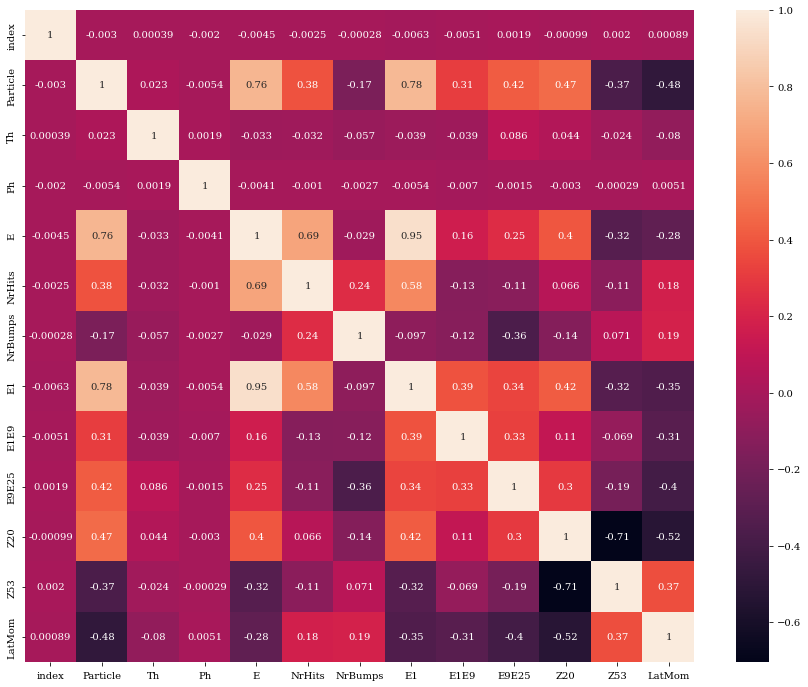

In [ ]:
#creating the correlation matrix
correlation_matrix = mixed_data.corr()

plt.figure(figsize=(15, 12))
#The heat map helps in visualizing the correlations
sn.heatmap(correlation_matrix, annot=True)
plt.show()

From the above matrix we can see how the energy correlations is elevated, and also the angles vs energy interconnection seem to be positive, as we hypothesised previously. Although this is still an initial guess, we may assume that optimum parameters for the classifier are energy features (E, E1, etc) and angles.

In order to proceed with the computations, we now define a function that, given a data set and a list of features of interest, gives as output the result of a **supervised** classifier algorithm that discern the photons hit from the neutrons. The function is able to work with four different types of classifiers:


*   Decision Tree Classifier
*   Random Forest Classifier
*   kNN Classifier
*   MLP Classifier

In the following cells we will create, examine and discuss which classifier(s) we consider to be of best choiche to tackle this task.   
Firstly, we create a function that appends to the collision data set columns containing normalize data features of interest, since some algorithm based on euclidean distance computation must require the use of normalized data.



In [ ]:
#Defining a function that normalizes the data (essential for classifiers that uses
#eucledian distance algorithm)

def normalize_data(data_set, feature_list):
    '''
    It returns the input data set with additional columns containing the normalized
    data of the categories in feature_list.
    It takes as arguments:
      data_set[list]: the data set containing the data
      feature_list[list]: array of the categories whose entries are to be normalized
    '''
    
    #In order to avoid overlapping of data sets, we copy the input data set
    data_normalized = data_set.copy()

    #Normalizing the data
    for feature in feature_list:
        feature_new = feature + "_normal"
        data_normalized[feature_new] = (data_normalized[feature] -
                                        data_normalized[feature].mean())/data_normalized[feature].std()

    return data_normalized

In [ ]:
#We apply normalization function to the data set for some features we consider
#useful for the algorithm (the feature Z20 comes from later analysis and thus it has 
#been included as well)

mixed_data = normalize_data(mixed_data,['E','E1','E1E9','E9E25', 'Th', 'Ph', 'Z20'])

We now move to creating the main function running the machine learning algorithm as well as a function returning the success rate of the computation. Additionally, we create a function that outputs the figure-of-merit (FOM) of the updated data set, a feature that we will try to optimize and we define additional functions for plotting purposes.

In [ ]:
#Creating the function that runs the different classifiers algorithm

def Supervised_classify(classifier, data_set, params,
              feature_list, prop_test, plot_ds=False, plot_tree=False, plot_network=False):
    '''
    The function returns the output of a supervised classifier from a list of four:
      * "DT":  Decision Tree Classifier
      * "RF":  Random Forest Classifier
      * "kNN": kNN Classifier
      * "MLP": MLP Classifier 
    The function also return the figure-of-merit (FOM) of the updated (with results 
    from the classifier algorithm) data set.
    The classifier discerns the number of photon from neutrons hitting the EMC 
    component of the Panda detector.
    It takes as arguments:
      classifier[string]: the classifier used to classify the data_set
      data_set[list]: the data_set input to the classifier
      params[list]: array of the relevant parameter needed for the classifier
      prop_test[float]: the fraction of data used as training sample
      feature_list[list]: array of the features of input to the classifier
      plot_ds[Boolean]:  plots decision surface output
      plot_tree[Boolean]: plots tree output for RD algorithm
      plot_network[Boolean]: plot layer network for multi-layer perceptron
    '''

    #Checking that the fraction of training data sample is below 100%
    assert 0<prop_test<1
     
    
    #We create a copy of the dataframe in order to avoid possible naming and indexing error
    data_tmp = data_set.copy()
    
    #We create a column specifying whether particle event is used for training or for testing
    data_tmp['is_train'] = np.random.uniform(0, 1, len(data_tmp)) <= (1-prop_test)
    
    #The training and testing data set are separated
    train, test = data_tmp[data_tmp['is_train']==True], data_tmp[data_tmp['is_train']==False]
    
    
    if   (classifier=="DT"):
        #Decision Tree Classifier with entropy as algorithm criterion 
        clf = tree.DecisionTreeClassifier(criterion='entropy',
                                          min_impurity_decrease=params[0],
                                          max_depth=params[1])
    elif (classifier=="RF"):
        #Random Forest Classifier
        clf = RandomForestClassifier(n_estimators=params[0], 
                                     max_features=params[1])
    elif (classifier=="kNN"):
        #kNN Classifier.
        clf = neighbors.KNeighborsClassifier(n_neighbors=params[0])
    elif (classifier=="MLP"):
        #MLP Classifier.
        clf = MLPClassifier(solver='lbfgs', activation='logistic', 
                            max_iter=5000, 
                            hidden_layer_sizes=params[0])
    else:
        print("<E> The classifier is not implemented: ", classifier)
        return None
    
    #We fit the data with the selected classifier by first training it
    clf.fit(train[feature_list],train['Particle'])
    trainpred = clf.predict(train[feature_list]) 
    train['prediction'] = [x for x in trainpred]
   
    #We predict the testing events  
    testpred = clf.predict(test[feature_list])   
    test['prediction'] = [x for x in testpred]
 
    data_update = train.append(test)
     
    # Make it possible to plot the decision surface if plot_ds flag set to True and # of features equals 2.
    if (plot_ds) & (len(feature_list)==2):
        PlotDecisionSurface(clf,data_update,feature_list)

    # In the case the classifier is a decision tree, allow for the possibility to plot the tree, 
    # only when plot_tree is set to True.
    if (plot_tree) & (classifier=="DT"): 
        PlotTree(clf, feature_list)
  
    # Plot the network structure in case of multi-layer perceptron
    # Only when plot_network flag is set to True. We will not use this in our 
    # computation
    # if (plot_network) & (classifier=="MLP"):   
    #     network_structure = np.hstack(([len(feature_list)], np.asarray(clf.hidden_layer_sizes), [data_set['Particle'].nunique()]))
    #     # Draw the Neural Network with weights given by clf.coefs_
    #     network=VisNN.DrawNN(network_structure, clf.coefs_)
    #     network.draw()
    
    #Obtaining the FOM value of the updated data set
    fom_value = FOM(data_update)
    # Return the updated version of the dataFrame including labels "is_train" and "predicted".
    return [data_update, fom_value]


def Success_rate(data_set):
  '''
  The function returns the fraction of successfull classifications of the training 
  and test part of the data_set. The input must be an output data set to the 
  Supervised_Classify function with columns "is_train" and "prediction".
  It takes as arguments:
    data_set[list]: the updated data set obtained after the classification algorithm.
  '''

  nrtrain_instances = len(data_set[(data_set.is_train == True)])
  nrtest_instances  = len(data_set[(data_set.is_train == False)])
    
  nrtrain_success = len(data_set[(data_set.is_train == True)  & (data_set.prediction == data_set.Particle)])
  nrtest_success  = len(data_set[(data_set.is_train == False) & (data_set.prediction == data_set.Particle)])
  success_train = nrtrain_success/nrtrain_instances  
  success_test = nrtest_success/nrtest_instances
  ret = """The success rate for the training set is: {}
The success rate for the testing set is: {}""".format(success_train, success_test)

  return [ret, success_train, success_test]


# Creating function that plots a classification tree when decision tree algorithms are used.
# In order to optimzie the procedure the module DOT and graphviz is used
def PlotTree(clf, feature_list):
    '''
    The function returns the decision tree of classifier "clf" with list of features
    given in "feature_list".
    It takes as arguments:
      clf[string]: the classifier of interest
      feature_list[list]: list of feature to be inputted to the classifier
    '''

    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data)
    tree_string = dot_data.getvalue()
    tree_string = re.sub('samples = [0-9]+\\\\n', '', tree_string) 
    for i, feature in enumerate(feature_list):
        tree_string = re.sub('X\[{}\]'.format(i), feature, tree_string) 
    with open('simple.dotfile', 'w+') as f:
        f.write(tree_string)
    !dot -Tpng simple.dotfile > simpletree.png  
    display(Image(filename ='simpletree.png'))

    return  


def PlotDecisionSurface(clf, data, feature_list, label='Particle', step = 0.01):
    '''
    The function returns a decision surface of classifier "clf" together with
    features from the two entries of the "features_list" of "data".
    It takes as arguments:
      clf[string]: the classifier used to classify the data_set
      data[list]: the data_set input to the classifier
      feature_list[list]: array of the features of input to the classifier
      label[string]: label of interset of the collisions
      step[float]: step for range of x and y values
    '''
    
    X = data[feature_list[0]].values
    Y = data[feature_list[1]].values
    
    #Colors are used to differentiate the plot
    cmap_light = ListedColormap(['#ffde9e', '#b8ea9d', '#ffbaba'])
    cmap_bold  = ListedColormap(['#ff8c28', '#11bb11', '#ff0000'])
    
    #Plotting the decision boundary.
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #Put the result into a color plot
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    #Plotting the data points
    plt.scatter(X, Y, s=40, c=data[label], cmap=cmap_bold)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(feature_list[0])
    plt.ylabel(feature_list[1])
    plt.show()

    return

def FOM(data):
  '''
  The function returns the figure-of-merit (FOM) value given a trained data set.
  It takes as arguments:
    data[list]: the trained data set
  '''
  #Selecting real and uncorrectly classified photons
  real_photons = data[(data.prediction == 1) & (data.Particle == 1) & (data.is_train == False)][['Particle','prediction']]
  fake_photons = data[(data.prediction == 1) & (data.Particle == 2) & (data.is_train == False)][['Particle','prediction']]

  photon_count_S = len(real_photons)
  neutron_count_B = len(fake_photons)

  fom = (photon_count_S)/np.sqrt(photon_count_S + neutron_count_B)

  return fom

After defining the general functions that are able to work with the machine learning algorithm, we now create a more user friendly function which allows for the user to interactively select the type of classifier, its respective parameters and the feature list to be used as input.  
It is important to notice that the function has some requirements on the parameters to be inputted:    



*   kNN or MLP take integer numerical value as sole parameter
*   For DT the first parameter (min_impurity_decrease) can be a float, the second one (max_depth) msut be an integer
*   For RF the first parameter (n_estimators) must be an int, the second parameter (max_features) can be a float less than the number of features used.






Please select the type of classifier from: "DT", "RF","kNN", "MLP"kNN
Please input the internal parameter of the classifier: 25
Please input the features to be optimized divided by a space. You can choose from:
 'Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom'. 
 E E1


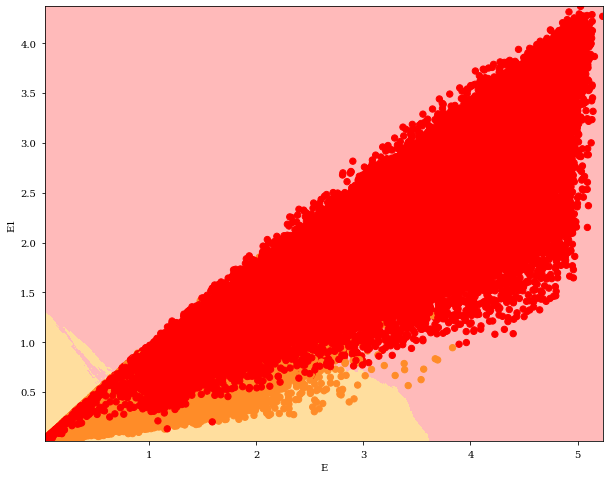

The FOM is: 138.69495376907201


(       index  Particle        Th  ...  Z20_normal  is_train  prediction
 0          0         1   49.9085  ...   -0.253790      True           1
 1          1         1   91.4437  ...   -0.005671      True           1
 2          2         1   21.5649  ...   -0.127658      True           1
 5          5         1   97.3716  ...   -0.325607      True           1
 6          6         1   63.8539  ...   -0.134599      True           2
 ...      ...       ...       ...  ...         ...       ...         ...
 86858  43346         2   35.0251  ...    0.527967     False           2
 86859  43347         2   79.8482  ...    0.444821     False           2
 86862  43350         2   55.9540  ...    0.499847     False           2
 86863  43351         2  152.1300  ...    0.442777     False           2
 86864  43352         2  150.5540  ...    0.525959     False           2
 
 [86872 rows x 22 columns], None)

In [ ]:
def interactive_classify():
  '''
  The function returns an interactive program that asks user for inputs to a 
  classification computation. After the classifier and the features are selected 
  by the user, the code uses the Supervised_classify function to outputs the updated
  data set as well as the FOM of the computation.
  '''
  classifier_input  = input('Please select the type of classifier from: "DT", "RF","kNN", "MLP"')
  if classifier_input == 'kNN' or classifier_input == 'MLP':
    parameter_input = input('Please input the internal parameter of the classifier: ')
    feature_list_input = input('Please input the features to be optimized divided by a space. '+
    'You can choose from:\n' + " 'Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom'. \n ").split()
    try:
      number_input = int(parameter_input) & (type(feature_list_input) == list)
    except:
      print('The parameter input is not a number/Please use a space to divide the features')  
      return None
    param = [int(parameter_input)]  
    #Running the classifier with the inputs from the user
    classify_1 = Supervised_classify(classifier_input, mixed_data, param,
             feature_list_input, prop_test = 0.5,
             plot_ds=True, plot_tree=False, plot_network=False)
    ret_1 = classify_1[0]
    fom_1 = print(f'The FOM is: {classify_1[1]}')
    return ret_1, fom_1
  elif classifier_input == 'DT':
    parameter_input_2 = input('Please input the first and second internal numerical parameter of the classifier divided by a space: ')
    list_parameter = parameter_input_2.split()
    feature_list_input_2 = input('Please input the features to be optimized divided by a space. '+
    'You can choose from:\n' + " 'Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom' ").split()

    try:
      (type(list_parameter) == list) & (type(feature_list_input_2) == list)
    except:
      print('The input is incorrect. Please use a space to divide the parameters')  
      return None
    param_2 = [float(list_parameter[0]), float(list_parameter[1])]  
    #Running the classifier with the inputs from the user
    classify = Supervised_classify(classifier_input, mixed_data, param_2,
             feature_list_input_2, prop_test = 0.5 ,
             plot_ds=True, plot_tree=True, plot_network=False)
    ret = classify[0]
    fom = print(f'The FOM is: {classify[1]}')
    return ret, fom
  else:
    parameter_input_3 = input('Please input the first and second internal numerical parameter of the classifier divided by a space: ')
    list_parameter_3 = parameter_input_3.split()
    feature_list_input_3 = input('Please input the features to be optimized divided by a space. '+
    'You can choose from:\n' + " 'Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom' ").split()
    try:
      (type(list_parameter_3) == list) & (type(feature_list_input_3) == list)
    except:
      print('The input is incorrect. Please use a space to divide the parameters')  
      return None
    param_3 = [int(list_parameter_3[0]), float(list_parameter_3[1])]  
    #Running the classifier with the inputs from the user
    classify_3 = Supervised_classify(classifier_input, mixed_data, param_3,
             feature_list_input_3, prop_test = 0.5 ,
             plot_ds=True, plot_tree=True, plot_network=False)
    ret_3 = classify_3[0]
    fom_3 = print(f'The FOM is: {classify_3[1]}')
    return ret_3, fom_3

interactive_classify()

We now proceed with the computation by first running the function using the Tree classifier. We do so because we expect the classifier to find the best features that give rise to the sub-trees in the algorithm. Therefore we can compare them to the guess we made at the beginning of the notebook as well as observing the algorithm efficiency. We also run the algorithm by varying the possible input features, in order to infer which one are redundant to the classifier and which one are key for the correct computation.

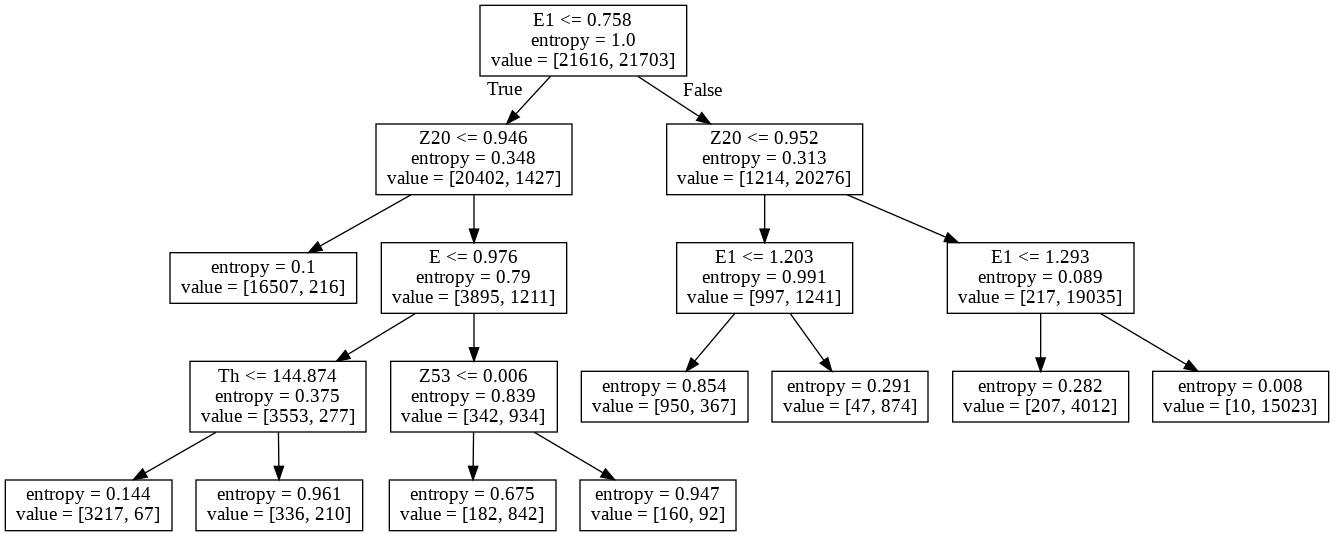

The success rate for the training set is: 0.9677277868833537
The success rate for the testing set is: 0.9667990723945538
The FOM is: 143.14804390665114


In [ ]:
#Running the Decision Tree classifier with a whole set of features

classifier            = 'DT'
min_impurity_decrease = 0.003
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5
#Features do not need to be normalized for this algorithm
feature_list          = ['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom' ] 
plot_ds               = False
plot_tree             = True
plot_network          = False

trees = Supervised_classify(classifier=classifier, data_set=mixed_data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

print(Success_rate(trees[0])[0])
print('The FOM is: {}'.format(trees[1]))

Above we have plotted the classification tree for the tree classifier algorithm. This picture is of useful importance, since we can infer that the main paramaters from a list of features containing both energies and angle collision categories that the tree algorithm consider with more information content are indeed the energy E1 and subsequently the other energies with the angles as sub trees. There is a strong preference for the feature E1 and also surprisingly we found the feature Z20 to be relevant in discerning the subtrees. We did not consider this at the beginning of the section, but by going back to the plots of Z20 vs Energies we can see that there exist useful correlation between the features such that the particle collisions are distinguishable for the classifier.     
We now run the classifier multiple times with different small set of features and discuss on the findings:




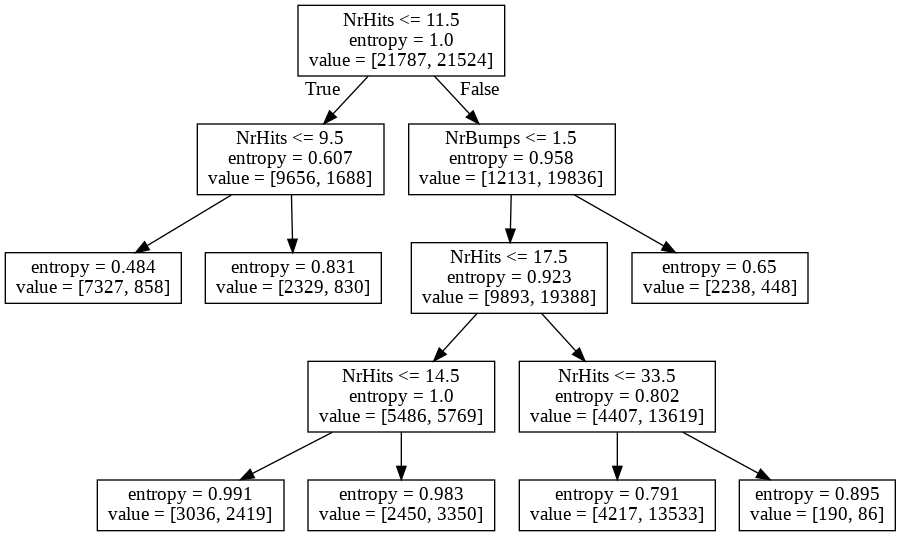

The success rate for the training set is: 0.7389115928978781
The success rate for the testing set is: 0.7392162714354583
The FOM is: 107.21969740334883


In [ ]:
#Running the Decision Tree classifier with different features

classifier            = 'DT'
min_impurity_decrease = 0.003
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5
#Features do not need to be normalized for this algorithm
feature_list          = ['NrHits', 'NrBumps'] 
plot_ds               = False
plot_tree             = True
plot_network          = False

trees_2 = Supervised_classify(classifier=classifier, data_set=mixed_data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

print(Success_rate(trees_2[0])[0])
print('The FOM is: {}'.format(trees_2[1]))

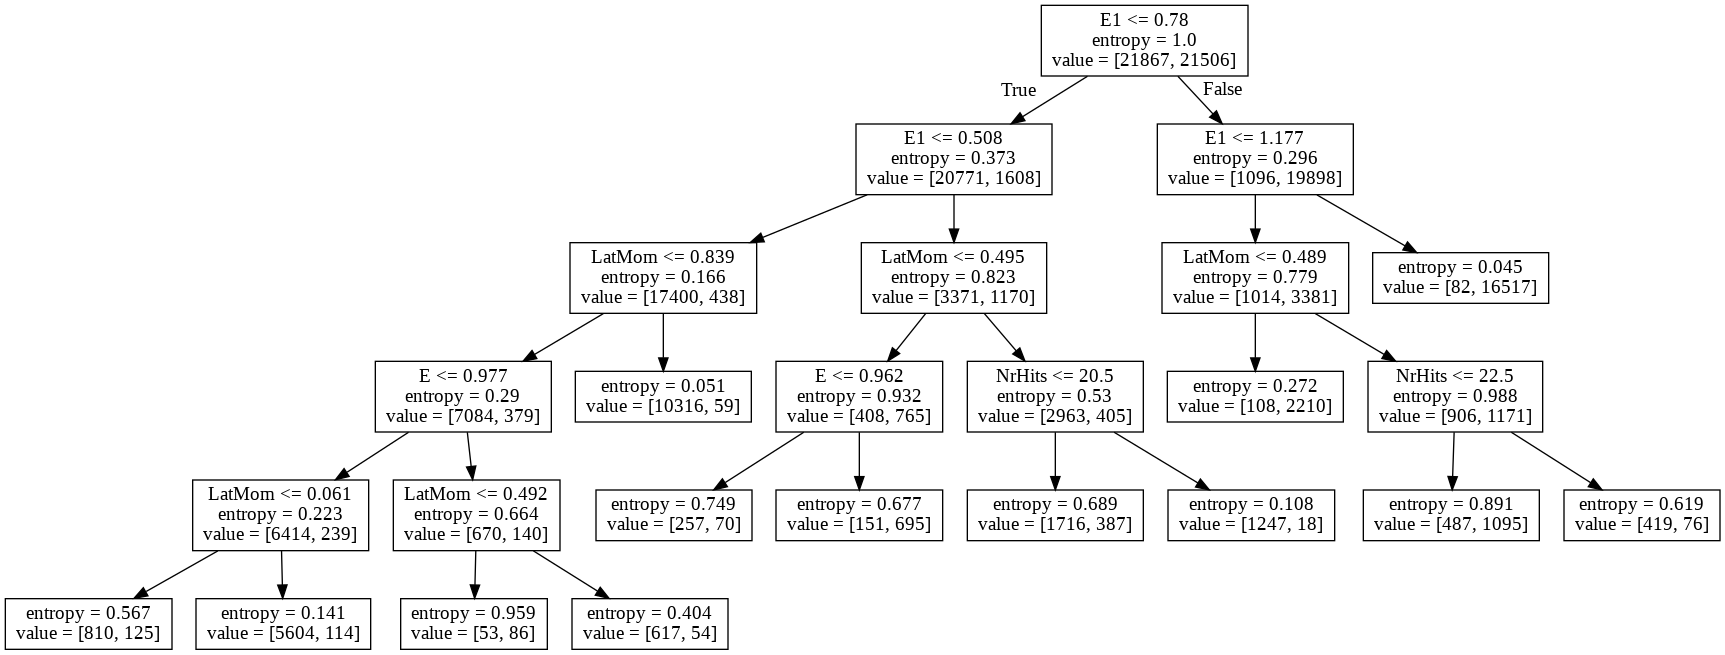

The success rate for the training set is: 0.9588684204458995
The success rate for the testing set is: 0.9586887054874824
The FOM is: 141.02079230651043


In [ ]:
classifier            = 'DT'
min_impurity_decrease = 0.003
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5
#Features do not need to be normalized for this algorithm
feature_list          = ['Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'LatMom' ] 
plot_ds               = False
plot_tree             = True
plot_network          = False

trees_3 = Supervised_classify(classifier=classifier, data_set=mixed_data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

print(Success_rate(trees_3[0])[0])
print('The FOM is: {}'.format(trees_3[1]))

We see that the FOM for the second computation is **considerably** lower than the first and last one (second fom FOM$\approx 103$ compared to the former FOM $\approx 142$  ! ), therefore we infer that both NrHits and NrBumbs are really not optimum features to be fed into a classifier algorithm. In order to stress this more, we also ran the tree algorithm with NrHits and NrBumbs alongside our initial guess of Energy and angles features. The resulting FOM is comparably higher and thus we can infer that these two features do not affect the computation unless used alone. We will avoid to use them.

From the result of the three tree graphs we now decide to include in ours further computations the following features:   


*  E
*  E1
*  Th
*  E1E9
*  Z20


We proceed the ufficial analysis now by running first the Decision tree algorithm, trying to optimise its parameters and then compare it with a similar computation carried out using kNN classifier. In the end we should be able to compare the two method, find relevant differences or analogies and decide which one gives the best result.  

Firstly, we apply cross validation to our analysis and computation and subsequently optimize the paramater for the Decision tree algorithm.


In [ ]:
#We create a cross validation function of the results to check for the validity
#and efficiency of the algorithm

def ClassifierTest(classifier, data, params, 
                    reps, prop_test, 
                    feature_list, 
                    plot_ds=False,
                    plot_tree=False):
    '''
    The function performs a classification for classifier "classifier" for "reps" 
    cross validations. 
    It returns the error rate for train and test samples as well as the fom of each
    classification.
    It takes as arguments:
      classifier[string]: the classifier used to classify the data
      data[list]: the data_set input to the classifier
      params[list]: array of the relevant parameter needed for the classifier
      reps[int]: the number of repetions of the algorithm computation
      prop_test[float]: the fraction of data used as training sample
      feature_list[list]: array of the features of input to the classifier
      plot_ds[Boolean]:  plots decision surface output
      plot_tree[Boolean]: plots tree output for RD algorithm
    '''
    
    assert 0<prop_test<1
      
    train_result = []
    test_result  = []
        
    #Running the classification algorithm reps times    
    for rep in range(reps):
      
        dn =  Supervised_classify(classifier, data, params,
              feature_list, prop_test,
             plot_ds=plot_ds, plot_tree=False, plot_network=False)
        

        success = Success_rate(dn[0])
        
        train_result.append(success[1])
        test_result.append(success[2])
        fom_value = FOM(dn[0])
        
    return [train_result, test_result, fom_value]



In [ ]:
#Given the decision tree classifier, we need to optimize the value of "min_impurity_decrease" (mid).
#Thus we run the DT_test for several values of "min_impurity_decrease" and plot the results
#We create a function that works and performs optimization both with the kNN and
#DT algorithm in order to save computational power

def optimize_parameter(classifier, data, param_list, prop_test, feature_list, reps, plot_ds=False,
                    plot_tree=False):
  '''
  The function returns a list of parameter(s) train and test errors and FOM for 
  reps number of classifications of the data set data.
  It takes as arguments:
      classifier[string]: the classifier used to classify the data
      data[list]: the data_set input to the classifier
      param_list[list]: array of the relevant parameter needed for the classifier
      prop_test[float]: the fraction of data used as training sample
      feature_list[list]: array of the features of input to the classifier
      reps[int]: the number of repetitions of the algorithm computation
      plot_ds[Boolean]:  plots decision surface output
      plot_tree[Boolean]: plots tree output for RD algorithm
  '''
              
  param_result = []  
  fom_result = []                 
  if classifier == 'kNN':
    for param in param_list :
        result = ClassifierTest(classifier, data, [param], reps , prop_test=0.5, feature_list=feature_list)
        #average of all the cross validations is takes as error train and test result
        train_error = 1 - np.mean(result[0])
        test_error  = 1 - np.mean(result[1]) # same for test samples
        param_result.append([train_error,test_error])
        fom_result.append(result[2])

  else:
    for param in param_list :
        result = ClassifierTest(classifier, data, [param, None], reps , prop_test=0.5, feature_list=feature_list)
        #average of all the cross validations is takes as error train and test result
        train_error = 1 - np.mean(result[0])
        test_error  = 1 - np.mean(result[1]) 
        param_result.append([train_error,test_error])
        fom_result.append(result[2])
        
  return param_result, fom_result


We can now create a range of plausible parameters and plot them alongside their average error in the classification process. Also, we plot the FOM for each computation and therefore we can graphically infer which parameter(s) and FOM value is the most suitable for our analysis (i.e. in case of multiple optimum options we try to avoid overfitting/underfitting results).

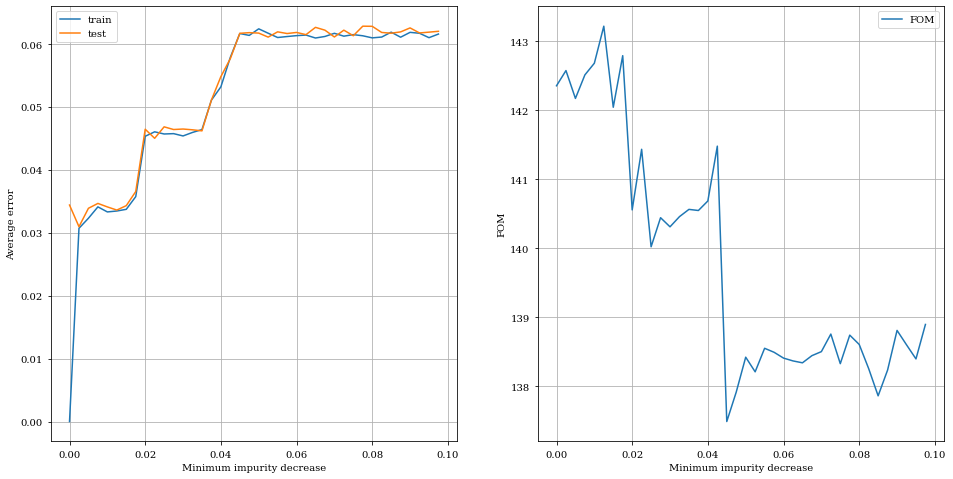

In [ ]:
#Plotting the fraction of classification errors versus "minimum impurity" for training
#and test part of the dataset

classifier = 'DT'
param_list = np.arange(0,0.1,0.0025)
#We use 5 repetitions. These may sound low value but it is mainly done to save 
#computing time for the notebook. Additionally, we also tried 10 and more
#and the results do not change. Indeed we found the same minimum clusters.
prop_test = 0.5
reps = 5 
feature_list = ['E_normal', 'E1_normal', 'E1E9_normal', 'Th_normal', 'Z20_normal']

param_results, fom_results = optimize_parameter(classifier, mixed_data, param_list, prop_test, feature_list, reps, plot_ds=False,    plot_tree=False)

# Plot the fraction of classification errors versus "k" for training and test part of the dataset
# Plot the FOM values versus "k" for both sets as well

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(param_list, np.transpose(param_results)[0],label='train')
ax[0].plot(param_list, np.transpose(param_results)[1],label='test')
ax[0].set_xlabel('Minimum impurity decrease')
ax[0].set_ylabel('Average error')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[1].plot(param_list, fom_results,label='FOM')
ax[1].set_xlabel('Minimum impurity decrease')
ax[1].set_ylabel('FOM')
ax[1].grid(True)
ax[1].legend(loc='best')
plt.show()



From the two graphs we can infer different features of the DT algorithm:   
Firstly, we have two candidates for the optimum value of the minimum impurity decrease for the decision tree classifier, specifically around $min = 0.01$  and $0.03$ (we disregard trivial results such as min = 0). They both correspond to a minimum in the function but we decide to use the latter value since we do not want to choose an overfitting result, given by the small error of the classifier function. Therefore we choose $min \approx 0.03$. Consequently, the resulting optimized value of the FOM follows to be $FOM \approx 141$. With the subsequent computation carried out by using the kNN classifier, we will compare the results and give the relevant conclusions.  
To recap using Decision tree :  
 $$\text{minimum impurity} \approx 0.03$$
 $$\text{FOM}\approx 141$$

We now proceed with the computation by running the classifier algorithm using kNN. Again, we will use as input features the relevant one we picked previously.

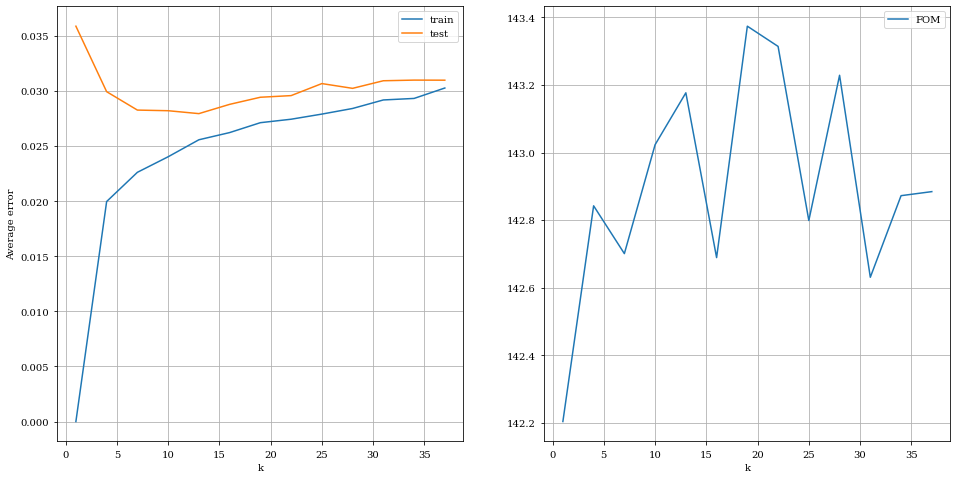

In [ ]:
# Running the computation for the kNN classifier

classifier = 'kNN'
param_list =  np.arange(1,40,3)
#The same argument as above holds. Notice how the kNN aglorithm is MUCH slower and
#computational heavy.
reps = 5
prop_test = 0.5
#This time we need normalized feature data
feature_list = ['E_normal', 'E1_normal', 'E1E9_normal', 'Th_normal', 'Z20_normal']

param_results, fom_results = optimize_parameter(classifier, mixed_data, param_list, prop_test, feature_list, reps, plot_ds=False,    plot_tree=False)

# Plot the fraction of classification errors versus "k" for training and test part of the dataset
# Plot the FOM values versus "k" for both sets as well

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(param_list, np.transpose(param_results)[0],label='train')
ax[0].plot(param_list, np.transpose(param_results)[1],label='test')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Average error')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[1].plot(param_list, fom_results,label='FOM')
ax[1].set_xlabel('k')
ax[1].grid(True)
ax[1].legend(loc='best')
plt.show()


The first difference we can notice with the Decision tree classifier is that its cousin kNN is considerably slower. However, the results we obtain are similar to the previous computation, if not better. Indeed, we found graphically that the optimum value for the parameter k (not overfitting/underfitting) is around $k\approx 10$ given five input features. Using this result, we obtain a value of the FOM of $\text{FOM} \approx 143.70$ which is higher than the one we found using the other classifier. The previous value of the $\text{FOM}\approx 141$ is around $2\%$ lower than the FOM obtained with the kNN algorithm.   
Therefore, although the time taken by the kNN classifier is much higher than the one for the decision tree, the results we obtain are more precise and accurate.  
Furthermore, we can compare the optimum FOM value found with the latest computation to the theoretical higher one given by:     


*   The total number of collisions are 86872 but we only use half of this for testing, thus we have 43436 test events
*   We expect to have around half of real neutrons and real photons inside the 43436 test events, thus S = 21718 and so B = 21718
*   In the higher optimum case we detect all the neutrons and throw them away from the data set so that B = 0
*   We are left with $$\text{FOM_optimum} = \frac{S}{\sqrt{S}}= \sqrt{S} = \sqrt{21718} = 147.37$$


We found respectively:  
$$\text{FOM_tree} \approx 141$$
$$\text{FOM_kNN} \approx 144$$

By comparing these FOM's with the highest theoretical one we see that the classification carried out using the kNN algorithm is more accurate than the decision tree algorithm, although they both yield to excellent results with only a small set of features selected at the beginning. It is also worth noticing that the decision tree is extremely more efficient computationally timewise with respect to the kNN classifier.    
As last step in our analysis we create a very helpful matrix used to visualize the classification results. 


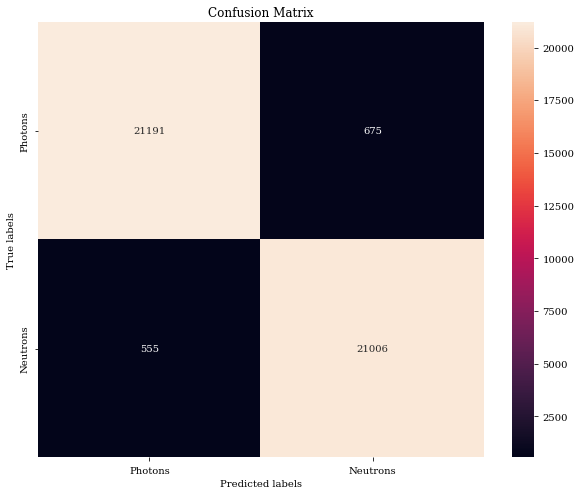

In [ ]:
#Creating the "confusion matrix", a useful tool in visualizing the true/false collisions of the particles 
#after the classification procedure. We use the kNN with the optimzied parameters
#we found previously. 

classifier='kNN'
param = [10]
prop_test = 0.5
feature_list = ['E_normal', 'E1_normal', 'E1E9_normal', 'Th_normal', 'Z20_normal']

data_new = Supervised_classify(classifier, mixed_data, param, feature_list, prop_test, False, False, False)[0]

# Extract the column with true labels and predicted labels, only for instances labeled as "test"
labels_true = data_new[data_new['is_train']==False][['Particle']].values
labels_pred = data_new[data_new['is_train']==False][['prediction']].values

# Confusion matrix whose i-th row and j-th column entry indicates the number of samples 
# with true label being i-th class and prediced label being j-th class.
#Creating the confusion matrix and plotting it in a more nice-to-visualize form
cm = confusion_matrix(labels_true, labels_pred, labels=[1, 2])

particle_names = ['Photons', 'Neutrons']

plt.figure(figsize=(10, 8))
ax = plt.subplot()
#Again we make sue of the heatmap
sns.heatmap(cm, annot=True, fmt='d', ax = ax); 

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
_ = ax.xaxis.set_ticklabels(particle_names) 
_ = ax.yaxis.set_ticklabels(particle_names)

The confusion matrix helps visualizing the results of the computation, which seem to be satisfying. There obviusly exist computation and classification errors but during this project we tried to minimize them, and obtain a valuable procedure that gives a precise classification of the collision events recorded in the PANDA experiment.



---



To recap, we started our analysis by visualing the collision data sets, guessing plausible efficient features for the classification and confirmed/denied them using cross validation and repetitive application of the algorithm. We noticed how both the tree and kNN algorithm lead to precise results, with a acceptable value of the FOM comparable to the highest theoretical one.   
In conclusion, we consider the kNN classifier as an excellent choice for this type of computation, although the decision tree surpasses kNN regarding time computation.